In [2]:
data_dir = "/Users/virennjay/Desktop/Projects/Real Life Keras/cell_images"

In [3]:
import os

In [4]:
os.listdir(data_dir)

['test', 'train']

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
from matplotlib.image import imread

In [7]:
test_path = f"{data_dir}/test"
training_path = f"{data_dir}/train" 

In [8]:
print(test_path)
print(training_path)

/Users/virennjay/Desktop/Projects/Real Life Keras/cell_images/test
/Users/virennjay/Desktop/Projects/Real Life Keras/cell_images/train


The data set contains two categories, `parasitized` and `infected`

In [9]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [10]:
os.listdir(training_path)

['parasitized', 'uninfected']

In [11]:
print("Listing  one image path")
single_image_name = os.listdir(f"{training_path}/parasitized")[0]
print(single_image_name)
single_image_path = f"{training_path}/parasitized/{single_image_name}"

Listing  one image path
C189P150ThinF_IMG_20151203_142224_cell_84.png


In [23]:
parasite_cell_image = imread(single_image_path)

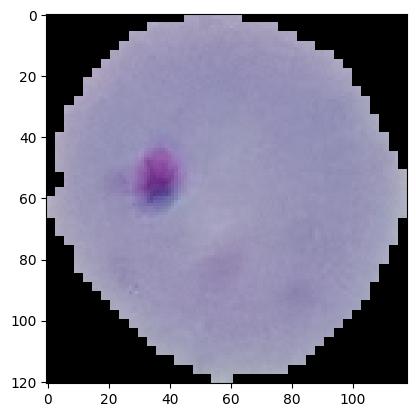

In [24]:
plt.imshow(parasite_cell_image)

In [14]:
cell_image.shape

(121, 118, 3)

(124, 133, 3)


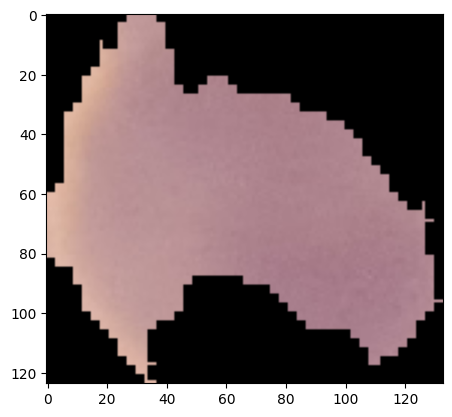

In [15]:
uninfected_image = imread("/Users/virennjay/Desktop/Projects/Real Life Keras/cell_images/train/uninfected/C1_thinF_IMG_20150604_104722_cell_66.png")
print(uninfected_image.shape)
plt.imshow(uninfected_image)


In [16]:
dim1 = []
dim2 = []


for image_filename in os.listdir(test_path + "/uninfected"):
    img = imread(test_path + "/uninfected/" + image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)


In [17]:
print(dim1)

[127, 109, 127, 118, 127, 118, 133, 115, 133, 142, 139, 121, 124, 133, 103, 148, 130, 118, 127, 142, 157, 175, 136, 151, 121, 160, 130, 139, 130, 154, 130, 148, 124, 136, 115, 151, 127, 124, 121, 121, 160, 127, 145, 124, 127, 124, 121, 112, 121, 178, 124, 145, 211, 142, 157, 118, 115, 145, 133, 133, 121, 121, 118, 136, 130, 127, 160, 115, 118, 142, 127, 145, 118, 118, 136, 121, 169, 130, 130, 121, 130, 139, 136, 112, 97, 142, 130, 124, 121, 136, 94, 130, 106, 163, 115, 130, 109, 103, 118, 124, 139, 121, 115, 127, 127, 121, 121, 130, 103, 163, 121, 184, 121, 103, 124, 112, 127, 139, 142, 118, 154, 124, 127, 145, 136, 118, 118, 139, 130, 157, 130, 130, 133, 115, 124, 151, 133, 127, 148, 139, 118, 151, 121, 124, 136, 124, 157, 130, 136, 163, 133, 136, 127, 169, 106, 142, 115, 136, 124, 118, 94, 157, 133, 118, 130, 139, 124, 139, 139, 151, 172, 142, 127, 145, 136, 124, 124, 166, 148, 109, 115, 148, 106, 136, 112, 121, 151, 166, 142, 118, 142, 160, 115, 112, 148, 142, 151, 103, 130, 121, 12

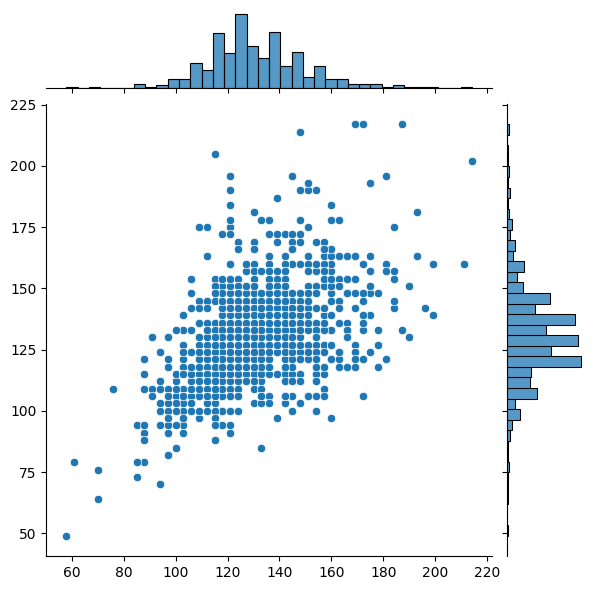

In [18]:
sns.jointplot(x=dim1,y=dim2)

We need to resize all the images, to ensure the uniformity in the shape of the images for training the convolutional neural network

In [19]:
print(np.mean(dim1),
np.mean(dim2))

130.92538461538462 130.75


In [20]:
image_shape = (130,130,3)

# ImageDataGenerator

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [22]:
image_gen = ImageDataGenerator(rotation_range=20,width_shift_range=0.1,height_shift_range=0.1,
                               shear_range=0.1,zoom_range=0.1,
                                horizontal_flip=True,fill_mode="nearest")
                                
# values can be rescaled by using the rescale = 1/255 argument

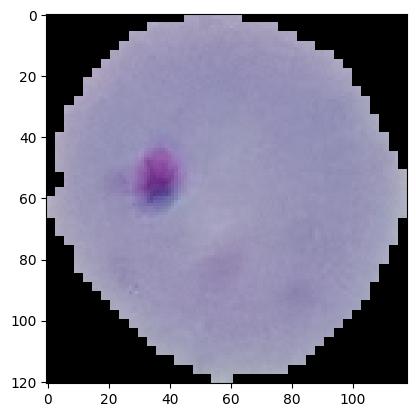

In [28]:
plt.imshow(parasite_cell_image)

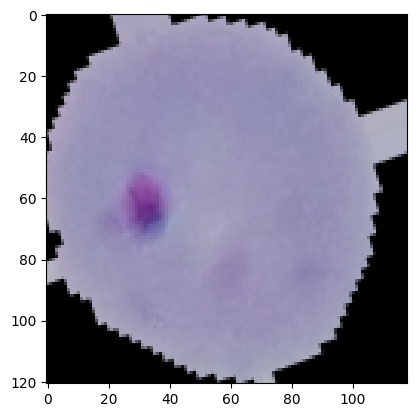

In [29]:
plt.imshow(image_gen.random_transform(parasite_cell_image))

In [30]:
image_gen.flow_from_directory(training_path)

Found 24958 images belonging to 2 classes.


In [31]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.
